Proyecto Investigación


- Pamela Jacqueline Selman David - 25002792
- Ana Lilian Aguilar Hernández - 17001130
- Hugo Danilo Castillo Torres  - 10002874

Este conjunto de datos proporciona datos detallados sobre la calidad del aire urbano y el impacto en la salud de las principales ciudades de EE. UU. Incluye condiciones climáticas, métricas de contaminación del aire (PM2.5, NO2, CO2) e información relacionada con la salud, como visitas al hospital y problemas de salud. El conjunto de datos está diseñado para ayudar a analizar la relación entre los factores ambientales y la salud pública, ofreciendo información sobre cómo la calidad del aire y las condiciones climáticas afectan los resultados de salud.

# EDA

In [3]:
# ============================================================
# 1. IMPORTACIÓN DE LIBRERÍAS Y CONFIGURACIÓN INICIAL
# ============================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Configuración de estilo
sns.set(style="whitegrid", palette="pastel", font_scale=1.1)
plt.rcParams['figure.figsize'] = (10, 5)

In [4]:

# ============================================================
# 2. CARGA DEL DATASET
# ============================================================

# 🔸 Si subes el archivo manualmente en Colab:
#from google.colab import files
#uploaded = files.upload()  # selecciona dataset.csv
df = pd.read_csv("dataset.csv")


print("✅ Dataset cargado correctamente desde Google Drive")
print("Dimensiones:", df.shape)
display(df.head())

✅ Dataset cargado correctamente desde Google Drive
Dimensiones: (1000, 46)


,datetime,datetimeEpoch,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,City,Temp_Range,Heat_Index,Severity_Score,Condition_Code,Month,Season,Day_of_Week,Is_Weekend,Health_Risk_Score
0,2024-09-07,1.725692e+09,106.1,91.0,98.5,104.0,88.1,95.9,51.5,21.0,...,Phoenix,15.1,95.918703,4.4300,NaN,9.0,Fall,Saturday,True,10.522170
1,2024-09-08,1.725779e+09,103.9,87.0,95.4,100.5,84.7,92.3,48.7,21.5,...,Phoenix,16.9,92.281316,3.8800,0.0,9.0,Fall,Sunday,True,10.062332
2,2024-09-09,1.725865e+09,105.0,83.9,94.7,99.9,81.6,90.6,41.7,16.9,...,Phoenix,21.1,90.599165,3.6300,0.0,9.0,Fall,Monday,False,9.673387
3,2024-09-10,1.725952e+09,106.1,81.2,93.9,100.6,79.5,89.8,39.1,15.7,...,Phoenix,24.9,89.638811,2.8512,0.0,9.0,Fall,Tuesday,False,9.411519
4,2024-09-11,1.726038e+09,106.1,82.1,94.0,101.0,80.0,90.0,40.1,15.9,...,Phoenix,24.0,89.760414,3.3908,0.0,9.0,Fall,Wednesday,False,9.515179


In [5]:
# ============================================================
# 3. EXPLORACIÓN INICIAL DEL DATASET
# ============================================================

print("Dimensiones del dataset:", df.shape)
print("\nVista previa:")
display(df.head())

print("\nInformación general:")
df.info()

print("\nEstadísticas descriptivas:")
display(df.describe(include='all'))

Dimensiones del dataset: (1000, 46)

Vista previa:


,datetime,datetimeEpoch,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,City,Temp_Range,Heat_Index,Severity_Score,Condition_Code,Month,Season,Day_of_Week,Is_Weekend,Health_Risk_Score
0,2024-09-07,1.725692e+09,106.1,91.0,98.5,104.0,88.1,95.9,51.5,21.0,...,Phoenix,15.1,95.918703,4.4300,NaN,9.0,Fall,Saturday,True,10.522170
1,2024-09-08,1.725779e+09,103.9,87.0,95.4,100.5,84.7,92.3,48.7,21.5,...,Phoenix,16.9,92.281316,3.8800,0.0,9.0,Fall,Sunday,True,10.062332
2,2024-09-09,1.725865e+09,105.0,83.9,94.7,99.9,81.6,90.6,41.7,16.9,...,Phoenix,21.1,90.599165,3.6300,0.0,9.0,Fall,Monday,False,9.673387
3,2024-09-10,1.725952e+09,106.1,81.2,93.9,100.6,79.5,89.8,39.1,15.7,...,Phoenix,24.9,89.638811,2.8512,0.0,9.0,Fall,Tuesday,False,9.411519
4,2024-09-11,1.726038e+09,106.1,82.1,94.0,101.0,80.0,90.0,40.1,15.9,...,Phoenix,24.0,89.760414,3.3908,0.0,9.0,Fall,Wednesday,False,9.515179



Información general:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 46 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   datetime           1000 non-null   object 
 1   datetimeEpoch      1000 non-null   float64
 2   tempmax            1000 non-null   float64
 3   tempmin            1000 non-null   float64
 4   temp               1000 non-null   float64
 5   feelslikemax       1000 non-null   float64
 6   feelslikemin       1000 non-null   float64
 7   feelslike          1000 non-null   float64
 8   dew                1000 non-null   float64
 9   humidity           1000 non-null   float64
 10  precip             1000 non-null   float64
 11  precipprob         1000 non-null   float64
 12  precipcover        1000 non-null   float64
 13  preciptype         378 non-null    object 
 14  snow               1000 non-null   float64
 15  snowdepth          929 non-null    float64
 16  win

,datetime,datetimeEpoch,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,City,Temp_Range,Heat_Index,Severity_Score,Condition_Code,Month,Season,Day_of_Week,Is_Weekend,Health_Risk_Score
count,1000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000,1000.000000,1000.000000,1000.000000,569.0,1000.0,1000,1000,1000,1000.000000
unique,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10,NaN,NaN,NaN,NaN,NaN,1,7,2,NaN
top,2024-09-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Chicago,NaN,NaN,NaN,NaN,NaN,Fall,Saturday,False,NaN
freq,74,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,131,NaN,NaN,NaN,NaN,NaN,1000,205,668,NaN
mean,NaN,1.726284e+09,85.106961,68.641638,76.115967,85.195384,68.547548,76.323286,57.267120,56.782281,...,NaN,16.469899,80.195613,3.057743,0.0,9.0,NaN,NaN,NaN,9.729103
std,NaN,3.745834e+05,9.524231,8.474102,8.722070,9.496951,8.365809,8.621361,9.161517,16.708667,...,NaN,5.552785,6.053805,0.624024,0.0,0.0,NaN,NaN,NaN,0.679728
min,NaN,1.725624e+09,62.035432,49.108218,55.548415,62.206413,48.834041,57.748822,26.261814,11.752135,...,NaN,1.676587,65.511677,1.578048,0.0,9.0,NaN,NaN,NaN,8.492431
25%,NaN,1.725948e+09,78.661118,62.678245,69.102499,78.485332,62.734961,68.930104,51.229378,49.982029,...,NaN,13.319119,76.287207,2.583375,0.0,9.0,NaN,NaN,NaN,9.195244
50%,NaN,1.726285e+09,84.322847,67.702405,75.222751,84.284077,67.844544,75.544961,58.598490,58.486182,...,NaN,16.694710,78.562345,3.026242,0.0,9.0,NaN,NaN,NaN,9.546156
75%,NaN,1.726616e+09,91.653987,75.585109,82.396698,93.757026,75.591093,84.309449,62.738294,66.560400,...,NaN,20.734495,85.318985,3.507127,0.0,9.0,NaN,NaN,NaN,10.242523


In [6]:
# ============================================================
# 4. LIMPIEZA DE DATOS
# ============================================================

# 🔸 4.1. Eliminar duplicados
df.drop_duplicates(inplace=True)

# 🔸 4.2. Reemplazar valores nulos o vacíos
print("\nValores nulos por columna:")
print(df.isnull().sum())

# Ejemplo: rellenar nulos numéricos con la media
num_cols = df.select_dtypes(include=np.number).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].mean())

# Ejemplo: rellenar nulos categóricos con la moda
cat_cols = df.select_dtypes(exclude=np.number).columns
for c in cat_cols:
    df[c].fillna(df[c].mode()[0], inplace=True)

# 🔸 4.3. Limpieza de espacios en columnas categóricas
for c in cat_cols:
    df[c] = df[c].astype(str).str.strip().str.lower()


Valores nulos por columna:
datetime               0
datetimeEpoch          0
tempmax                0
tempmin                0
temp                   0
feelslikemax           0
feelslikemin           0
feelslike              0
dew                    0
humidity               0
precip                 0
precipprob             0
precipcover            0
preciptype           622
snow                   0
snowdepth             71
windgust               0
windspeed              0
winddir                0
pressure               0
cloudcover             0
visibility             0
solarradiation         0
solarenergy            0
uvindex                0
severerisk             0
sunrise                0
sunriseEpoch           0
sunset                 0
sunsetEpoch            0
moonphase              0
conditions             0
description            0
icon                   0
stations             933
source                 0
City                   0
Temp_Range             0
Heat_Index            

C:\Users\pamel\AppData\Local\Temp\ipykernel_29288\674152323.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[c].fillna(df[c].mode()[0], inplace=True)


In [7]:

# ============================================================
# 5. NORMALIZACIÓN DE VARIABLES NUMÉRICAS
# ============================================================

scaler = StandardScaler()
df_scaled = df.copy()
df_scaled[num_cols] = scaler.fit_transform(df[num_cols])

print("\nDatos normalizados (primeras filas):")
display(df_scaled.head())


Datos normalizados (primeras filas):


,datetime,datetimeEpoch,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,City,Temp_Range,Heat_Index,Severity_Score,Condition_Code,Month,Season,Day_of_Week,Is_Weekend,Health_Risk_Score
0,2024-09-07,-1.580954,2.205274,2.639755,2.567651,1.981059,2.338356,2.271858,-0.629809,-2.142612,...,phoenix,-0.246828,2.598524,2.200148,0.0,0.0,fall,saturday,true,1.167325
1,2024-09-08,-1.350182,1.974169,2.167492,2.212053,1.612336,1.931736,1.854082,-0.935588,-2.112672,...,phoenix,0.077496,1.997380,1.318330,0.0,0.0,fall,sunday,true,0.490483
2,2024-09-09,-1.119410,2.089722,1.801488,2.131757,1.549126,1.560995,1.656798,-1.700036,-2.388116,...,phoenix,0.834251,1.719374,0.917503,0.0,0.0,fall,monday,false,-0.082010
3,2024-09-10,-0.888639,2.205274,1.482711,2.039989,1.622871,1.309847,1.563959,-1.983974,-2.459971,...,phoenix,1.518935,1.560659,-0.331151,0.0,0.0,fall,tuesday,false,-0.467455
4,2024-09-11,-0.657867,2.205274,1.588970,2.051460,1.665011,1.369644,1.587169,-1.874767,-2.447995,...,phoenix,1.356773,1.580756,0.533993,0.0,0.0,fall,wednesday,false,-0.314878


In [11]:
# ============================================================
# 6. ANÁLISIS EXPLORATORIO (EDA)
# ============================================================

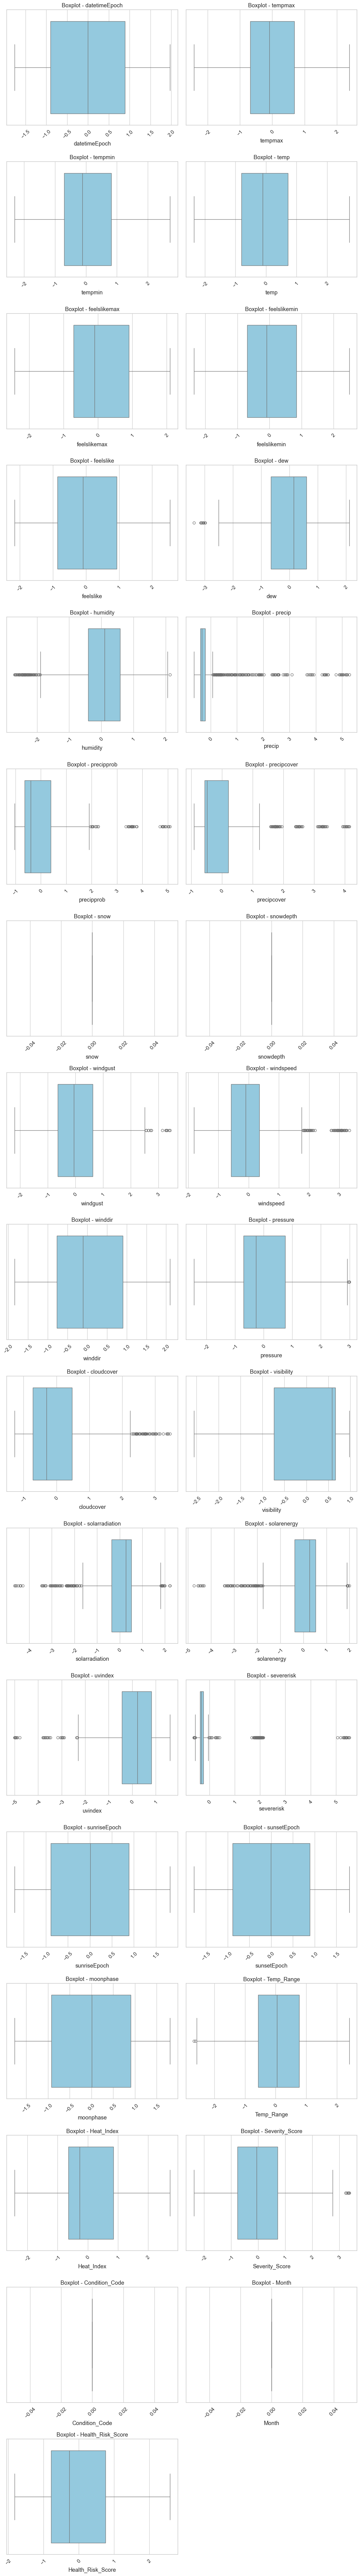

In [13]:
# 🔸 6.1. Distribución de variables numéricas (boxplots)

import matplotlib.pyplot as plt
import seaborn as sns
import math

# Número de variables
num_vars = len(num_cols)

# Configurar 2 gráficos por fila
cols = 2
rows = math.ceil(num_vars / cols)

# Crear figura con subplots en matriz
fig, axes = plt.subplots(rows, cols, figsize=(6 * cols, 5 * rows))
axes = axes.flatten()  # Aplanar para indexar fácilmente

# Graficar cada boxplot
for i, col in enumerate(num_cols):
    sns.boxplot(data=df_scaled, x=col, ax=axes[i], color='skyblue')
    axes[i].set_title(f"Boxplot - {col}")
    axes[i].tick_params(axis='x', rotation=45)

# Ocultar subplots vacíos si sobran
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

In [15]:
# 🔸 6.2. Matriz de correlación
corr_matrix = df_scaled[num_cols].corr()
print("\nMatriz de correlación:")
display(corr_matrix)


Matriz de correlación:


,datetimeEpoch,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,...,severerisk,sunriseEpoch,sunsetEpoch,moonphase,Temp_Range,Heat_Index,Severity_Score,Condition_Code,Month,Health_Risk_Score
datetimeEpoch,1.000000,-0.009753,0.152861,0.045901,-0.015768,0.164148,0.055531,0.046728,0.000268,0.053142,...,0.285721,0.992032,0.992068,0.990523,-0.243548,0.083644,-0.369008,NaN,NaN,-0.111190
tempmax,-0.009753,1.000000,0.808405,0.936353,0.952111,0.801754,0.912584,0.045593,-0.609694,-0.047861,...,0.305707,-0.016824,-0.008860,-0.010851,0.465754,0.780744,0.277908,NaN,NaN,0.354713
tempmin,0.152861,0.808405,1.000000,0.944321,0.820330,0.988296,0.939621,0.258251,-0.396124,0.129018,...,0.366885,0.146502,0.149014,0.147357,-0.127163,0.738725,0.226903,NaN,NaN,0.434786
temp,0.045901,0.936353,0.944321,1.000000,0.920431,0.939750,0.976463,0.150877,-0.538453,0.041237,...,0.343067,0.039187,0.044418,0.042298,0.163660,0.800903,0.275709,NaN,NaN,0.412288
feelslikemax,-0.015768,0.952111,0.820330,0.920431,1.000000,0.821445,0.942921,0.262477,-0.418409,0.038671,...,0.408079,-0.020071,-0.015194,-0.017145,0.377892,0.815434,0.247352,NaN,NaN,0.518574
feelslikemin,0.164148,0.801754,0.988296,0.939750,0.821445,1.000000,0.942326,0.290646,-0.375796,0.126306,...,0.387913,0.158598,0.160489,0.159993,-0.132728,0.740163,0.230200,NaN,NaN,0.454905
feelslike,0.055531,0.912584,0.939621,0.976463,0.942921,0.942326,1.000000,0.288758,-0.425092,0.081487,...,0.427733,0.049190,0.054036,0.051623,0.130651,0.827673,0.267552,NaN,NaN,0.522430
dew,0.046728,0.045593,0.258251,0.150877,0.262477,0.290646,0.288758,1.000000,0.706298,0.338506,...,0.392131,0.054370,0.042825,0.038797,-0.310402,0.072294,-0.038384,NaN,NaN,0.581391
humidity,0.000268,-0.609694,-0.396124,-0.538453,-0.418409,-0.375796,-0.425092,0.706298,1.000000,0.296729,...,0.067886,0.011669,-0.002842,-0.006098,-0.434812,-0.520533,-0.243100,NaN,NaN,0.186211
precip,0.053142,-0.047861,0.129018,0.041237,0.038671,0.126306,0.081487,0.338506,0.296729,1.000000,...,0.074407,0.057210,0.050426,0.046980,-0.268911,0.006086,-0.151194,NaN,NaN,0.143755


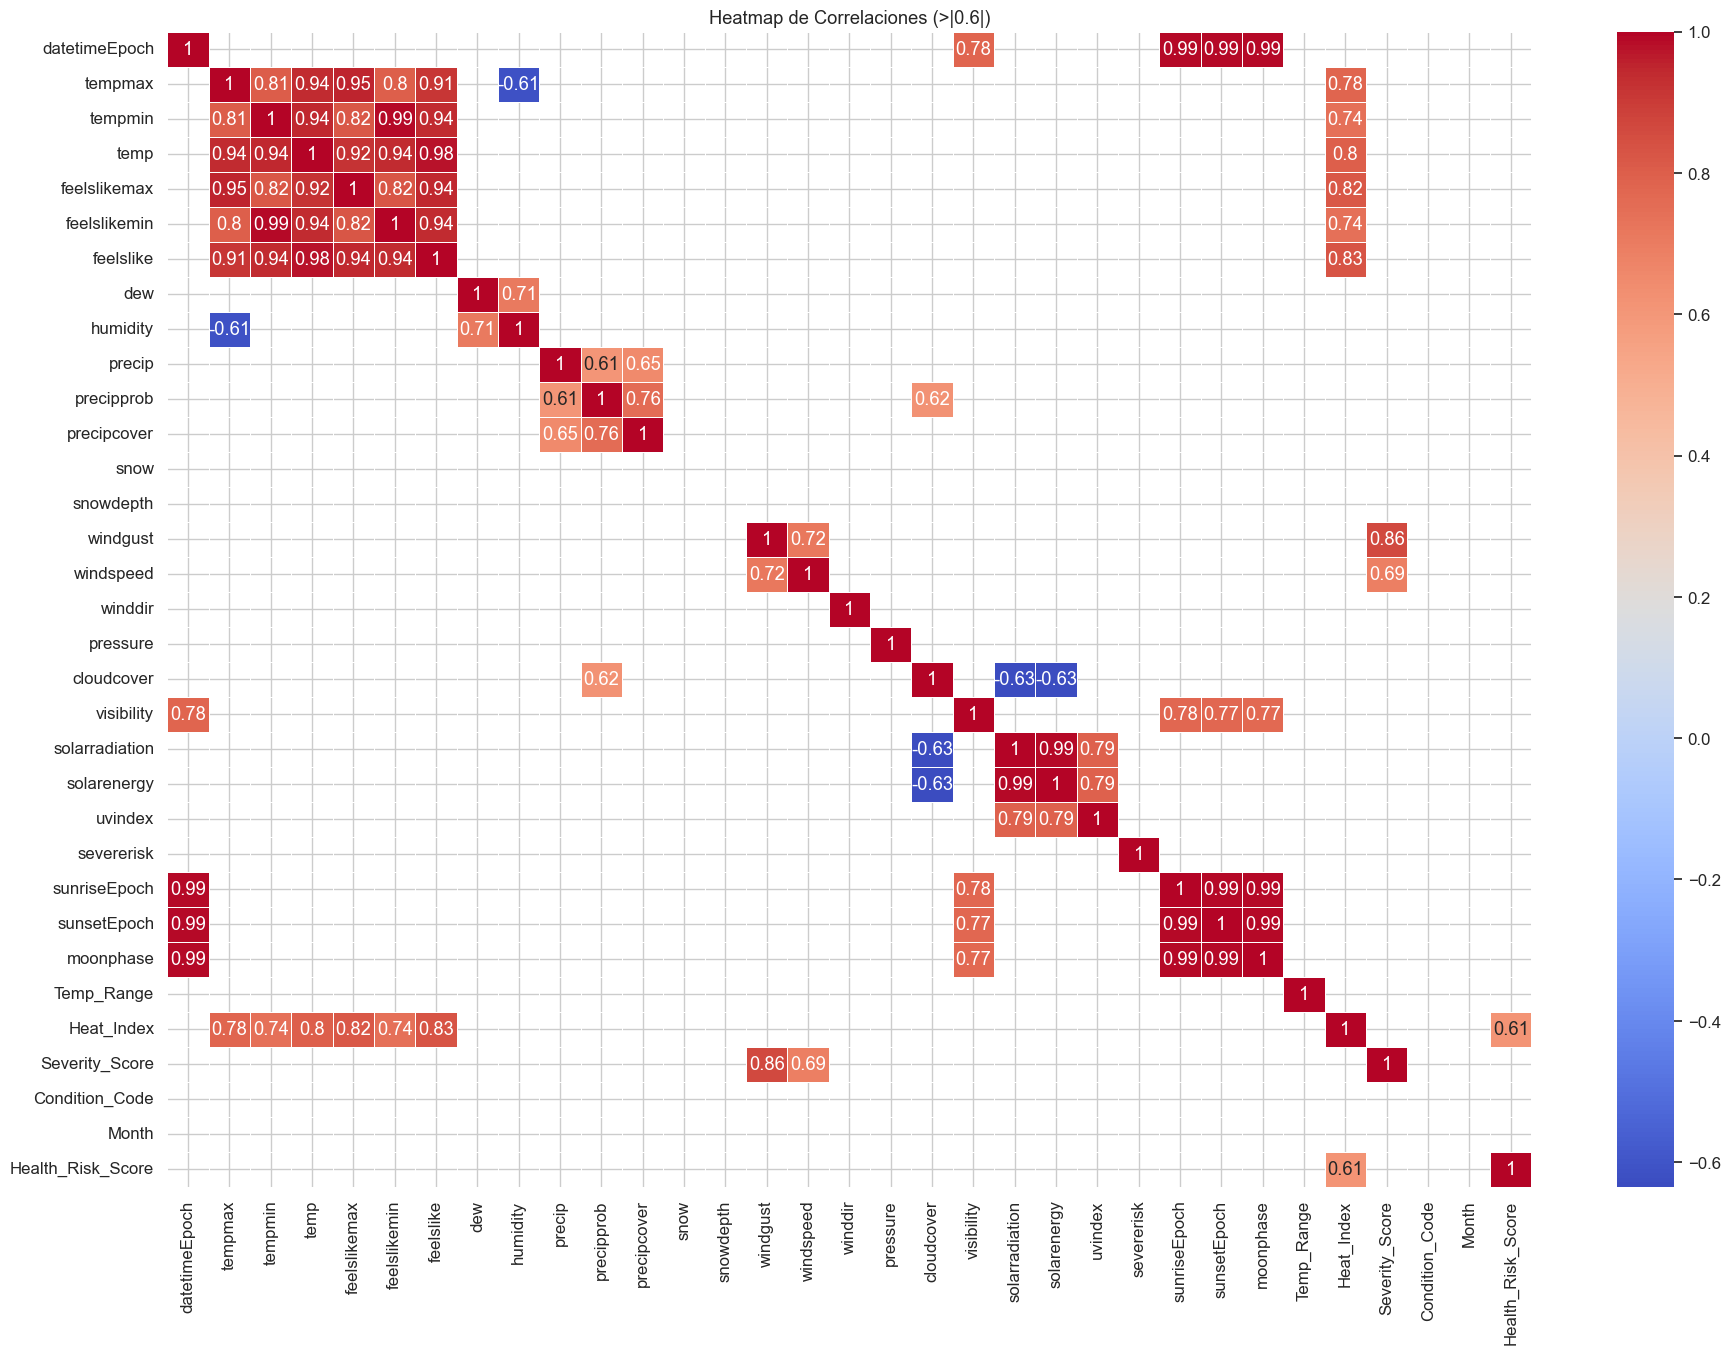

In [28]:
# 🔸 6.3. Heatmap de correlación
import numpy as np

# Filtrar correlaciones fuertes
threshold = 0.6
mask = np.abs(corr_matrix) >= threshold
filtered_corr = corr_matrix.where(mask)

plt.figure(figsize=(22, 15))
sns.heatmap(filtered_corr, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Heatmap de Correlaciones (>|0.6|)")
plt.show()

In [ ]:
# ============================================================
# 7. RESUMEN FINAL
# ============================================================

print("\n✅ Limpieza, normalización y EDA completados correctamente.")
print("Columnas numéricas:", list(num_cols))
print("Columnas categóricas:", list(cat_cols))

# PCA

   Componente  Varianza explicada  Varianza acumulada
0         PC1        2.675433e-01            0.267543
1         PC2        2.194581e-01            0.487001
2         PC3        1.624710e-01            0.649472
3         PC4        7.880395e-02            0.728276
4         PC5        6.013673e-02            0.788413
5         PC6        4.385277e-02            0.832266
6         PC7        3.176951e-02            0.864035
7         PC8        3.022931e-02            0.894265
8         PC9        2.286684e-02            0.917132
9        PC10        1.535366e-02            0.932485
10       PC11        1.411613e-02            0.946601
11       PC12        1.157275e-02            0.958174
12       PC13        1.100547e-02            0.969180
13       PC14        8.173598e-03            0.977353
14       PC15        7.849335e-03            0.985202
15       PC16        6.168751e-03            0.991371
16       PC17        3.604975e-03            0.994976
17       PC18        1.10644

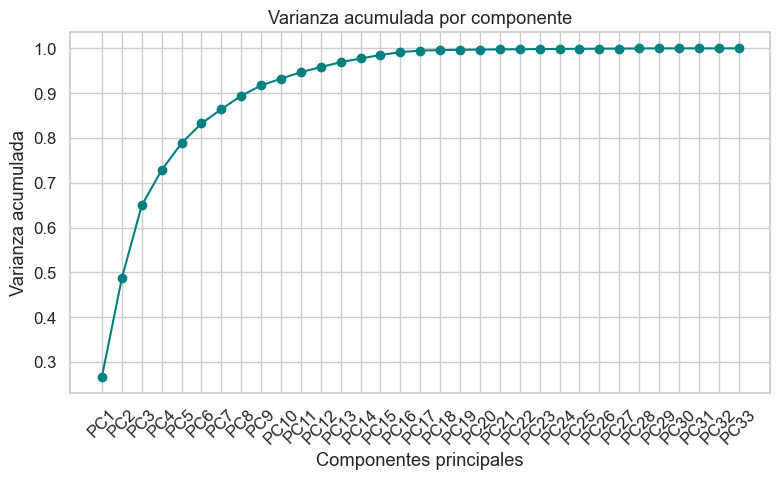

Cargas de cada variable en los componentes:
                        PC1       PC2       PC3       PC4       PC5       PC6  \
datetimeEpoch     -0.002160 -0.287354  0.283161  0.167672 -0.060974  0.012522   
tempmax            0.324602  0.042625  0.098451 -0.186166 -0.035070  0.072737   
tempmin            0.326091 -0.087432  0.026822 -0.056956 -0.055510 -0.164251   
temp               0.341687 -0.018538  0.053332 -0.134882 -0.060723 -0.051806   
feelslikemax       0.335472  0.002884  0.041752 -0.149862  0.092163  0.121475   
feelslikemin       0.326819 -0.092204  0.025222 -0.040678 -0.047275 -0.142313   
feelslike          0.348163 -0.040260  0.026505 -0.095578  0.016565  0.002311   
dew                0.092788 -0.178924 -0.209508  0.135632  0.391369  0.216116   
humidity          -0.156136 -0.148964 -0.224301  0.184171  0.391195  0.103843   
precip             0.027074 -0.183667 -0.214716 -0.087079  0.094916 -0.112393   
precipprob         0.076620 -0.242955 -0.252080 -0.010280  0.0366

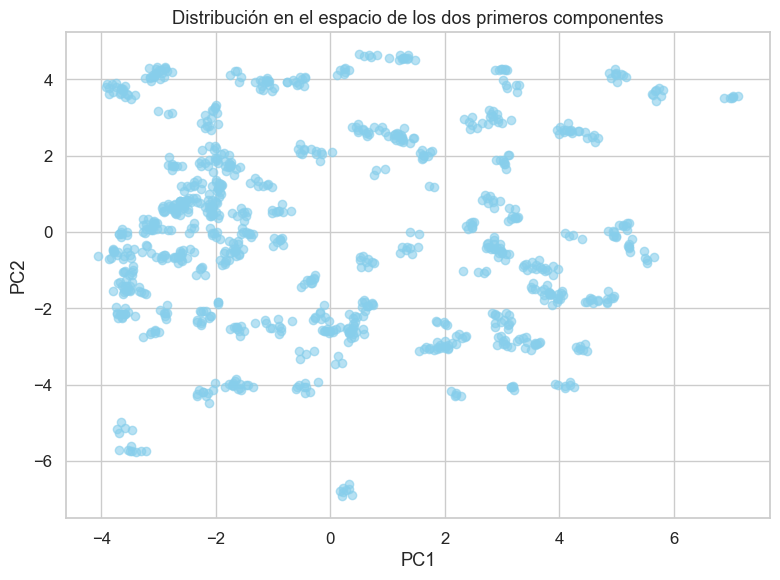

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Escalar los datos
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df[num_cols]), columns=num_cols)

# Aplicar PCA
pca = PCA()
pca_components = pca.fit_transform(df_scaled)

# Crear DataFrame con componentes
df_pca = pd.DataFrame(pca_components, columns=[f'PC{i+1}' for i in range(pca_components.shape[1])])

# Mostrar varianza explicada por componente
explained_var = pd.DataFrame({
    'Componente': [f'PC{i+1}' for i in range(len(pca.explained_variance_ratio_))],
    'Varianza explicada': pca.explained_variance_ratio_,
    'Varianza acumulada': pca.explained_variance_ratio_.cumsum()
})
print(explained_var)

# Visualizar varianza acumulada
plt.figure(figsize=(8, 5))
plt.plot(explained_var['Componente'], explained_var['Varianza acumulada'], marker='o', color='teal')
plt.title('Varianza acumulada por componente')
plt.xlabel('Componentes principales')
plt.ylabel('Varianza acumulada')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# Mostrar cargas (loadings) de cada variable
loadings = pd.DataFrame(pca.components_.T, index=num_cols, columns=[f'PC{i+1}' for i in range(pca_components.shape[1])])
print("Cargas de cada variable en los componentes:")
print(loadings)

# Visualizar los dos primeros componentes
plt.figure(figsize=(8, 6))
plt.scatter(df_pca['PC1'], df_pca['PC2'], alpha=0.6, color='skyblue')
plt.title('Distribución en el espacio de los dos primeros componentes')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid(True)
plt.tight_layout()
plt.show()

# Clustering

# Modelado

# Visualizacion e Interpretabilidad